**NOW WE WILL SEE THE EFFECT OF INCREASING EVS ON THE EXECUTION TIME OF THE COMPLETE PROTOCOL.**

ITS PERFORMED IN USING THE SHA 1 HASHING ALGORITHM.

Iteration: 1, Key Size: 512 bits, Execution Time: 29.24 ms
Iteration: 2, Key Size: 512 bits, Execution Time: 23.99 ms
Iteration: 3, Key Size: 512 bits, Execution Time: 30.39 ms
Iteration: 4, Key Size: 512 bits, Execution Time: 29.68 ms
Iteration: 5, Key Size: 512 bits, Execution Time: 26.54 ms
Iteration: 6, Key Size: 512 bits, Execution Time: 27.13 ms
Iteration: 7, Key Size: 512 bits, Execution Time: 22.81 ms
Iteration: 8, Key Size: 512 bits, Execution Time: 25.38 ms
Iteration: 9, Key Size: 512 bits, Execution Time: 28.78 ms
Iteration: 10, Key Size: 512 bits, Execution Time: 27.68 ms
Iteration: 11, Key Size: 512 bits, Execution Time: 26.42 ms
Iteration: 12, Key Size: 512 bits, Execution Time: 26.35 ms
Iteration: 13, Key Size: 512 bits, Execution Time: 27.11 ms
Iteration: 14, Key Size: 512 bits, Execution Time: 22.80 ms
Iteration: 15, Key Size: 512 bits, Execution Time: 22.44 ms
Iteration: 16, Key Size: 512 bits, Execution Time: 38.64 ms
Iteration: 17, Key Size: 512 bits, Execution Time

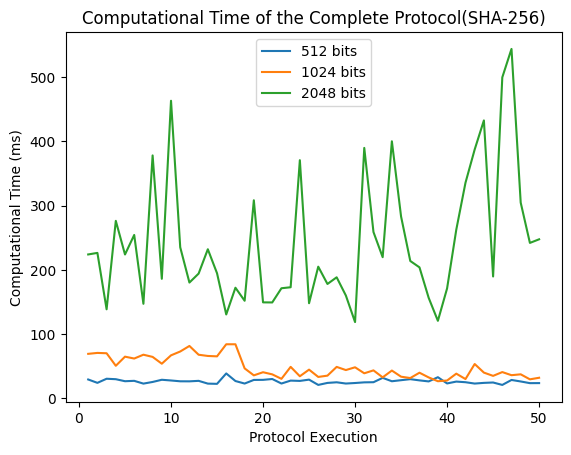

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self, key_size):
        self.key_size = key_size

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha256(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=self.key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)


def plot_computational_time(x_values, y_values, key_sizes):
    for i, key_size in enumerate(key_sizes):
        plt.plot(x_values, y_values[i], label=f'{key_size} bits')

    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Complete Protocol(SHA-256)')
    plt.legend()
    plt.show()


def main():
    num_executions = 50
    key_sizes = [512, 1024, 2048]
    x_values = list(range(1, num_executions + 1))
    y_values = [[] for _ in key_sizes]

    for i, key_size in enumerate(key_sizes):
        for iteration in range(num_executions):
            udc = UDC(key_size)
            execution_time = run_protocol(udc)
            y_values[i].append(execution_time)
            print(f"Iteration: {iteration + 1}, Key Size: {key_size} bits, Execution Time: {execution_time:.2f} ms")

    plot_computational_time(x_values, y_values, key_sizes)


if __name__ == '__main__':
    main()


NOW, WE WILL BE USING SHA-256 INSTEAD OF THE SHA-1 (THATS ORIGINALLY USED IN THE PROTOCOL) AND SEE THE RESULTS.

Iteration: 1, Key Size: 512 bits, Execution Time: 10.11 ms
Iteration: 2, Key Size: 512 bits, Execution Time: 9.65 ms
Iteration: 3, Key Size: 512 bits, Execution Time: 11.87 ms
Iteration: 4, Key Size: 512 bits, Execution Time: 9.42 ms
Iteration: 5, Key Size: 512 bits, Execution Time: 9.84 ms
Iteration: 6, Key Size: 512 bits, Execution Time: 10.10 ms
Iteration: 7, Key Size: 512 bits, Execution Time: 12.28 ms
Iteration: 8, Key Size: 512 bits, Execution Time: 10.41 ms
Iteration: 9, Key Size: 512 bits, Execution Time: 10.04 ms
Iteration: 10, Key Size: 512 bits, Execution Time: 9.39 ms
Iteration: 11, Key Size: 512 bits, Execution Time: 8.84 ms
Iteration: 12, Key Size: 512 bits, Execution Time: 10.97 ms
Iteration: 13, Key Size: 512 bits, Execution Time: 10.07 ms
Iteration: 14, Key Size: 512 bits, Execution Time: 10.61 ms
Iteration: 15, Key Size: 512 bits, Execution Time: 10.11 ms
Iteration: 16, Key Size: 512 bits, Execution Time: 9.24 ms
Iteration: 17, Key Size: 512 bits, Execution Time: 10.2

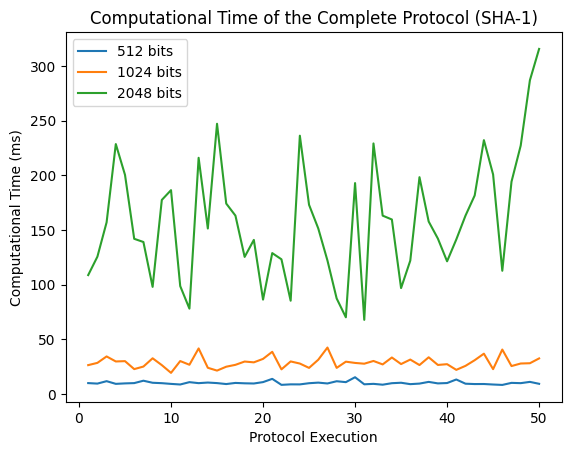

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self, key_size):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc, key_size, iteration):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity, key_size)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity, key_size)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity, key_size)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)



def plot_computational_time(x_values, y_values, key_sizes):
    for i, key_size in enumerate(key_sizes):
        plt.plot(x_values, y_values[i], label=f'{key_size} bits')

    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Complete Protocol (SHA-1)')
    plt.legend()
    plt.show()


def main():
    key_sizes = [512, 1024, 2048]
    num_executions = 50

    x_values = list(range(1, num_executions + 1))
    y_values = [[] for _ in key_sizes]

    for i, key_size in enumerate(key_sizes):
        udc = UDC()
        for iteration in range(num_executions):
            execution_time = run_protocol(udc, key_size, iteration)
            y_values[i].append(execution_time)
            print(f"Iteration: {iteration + 1}, Key Size: {key_size} bits, Execution Time: {execution_time:.2f} ms")
    plot_computational_time(x_values, y_values, key_sizes)


if __name__ == '__main__':
    main()


**EFFECT OF THE EVs, CSs, RSUs Density on the Protocol:**

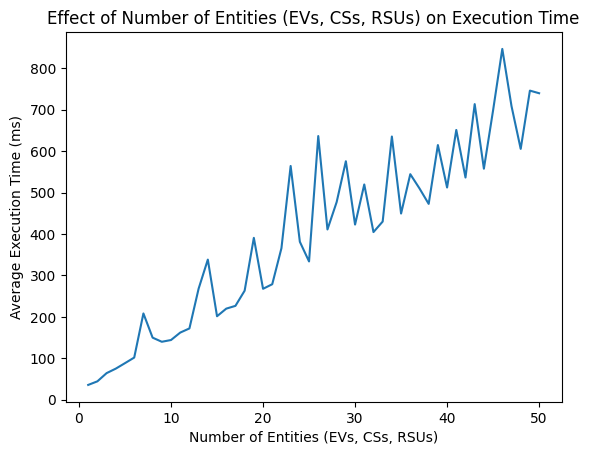

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self, key_size):
        self.key_size = key_size

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha256(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=self.key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc, num_evs):
    ev_identities = [f"EV{i+1}" for i in range(num_evs)]
    ev_public_keys = []
    ev_pseudo_identities = []

    # Registration process for EVs
    for ev_identity in ev_identities:
        ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
        ev_public_keys.append(ev_public_key)
        ev_pseudo_identities.append(ev_pseudo_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = []
    for i in range(num_evs):
        auth_ev_udc.append(udc.calculate_auth_ev_udc(ev_public_keys[i], ev_pseudo_identities[i], t_ev))

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)


def plot_computational_time(x_values, y_values):
    plt.plot(x_values, y_values)
    plt.xlabel('Number of Entities (EVs, CSs, RSUs)')
    plt.ylabel('Average Execution Time (ms)')
    plt.title('Effect of Number of Entities (EVs, CSs, RSUs) on Execution Time')
    plt.show()


def main():
    num_executions = 10
    max_num_evs = 50
    x_values = list(range(1, max_num_evs + 1))
    y_values = []

    for num_evs in range(1, max_num_evs + 1):
        total_execution_time = 0

        for _ in range(num_executions):
            udc = UDC(1024)
            execution_time = run_protocol(udc, num_evs)
            total_execution_time += execution_time

        average_execution_time = total_execution_time / num_executions
        y_values.append(average_execution_time)

    plot_computational_time(x_values, y_values)


if __name__ == '__main__':
    main()


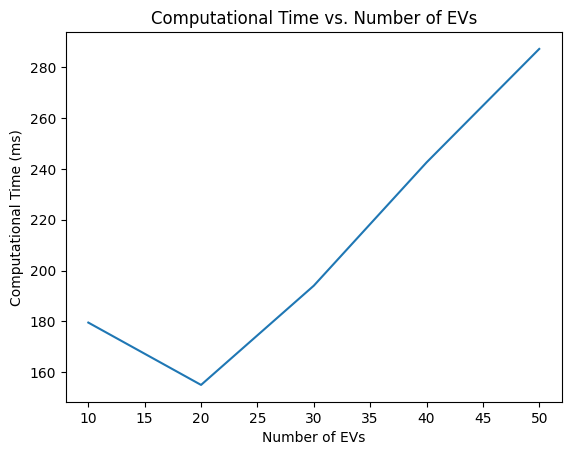

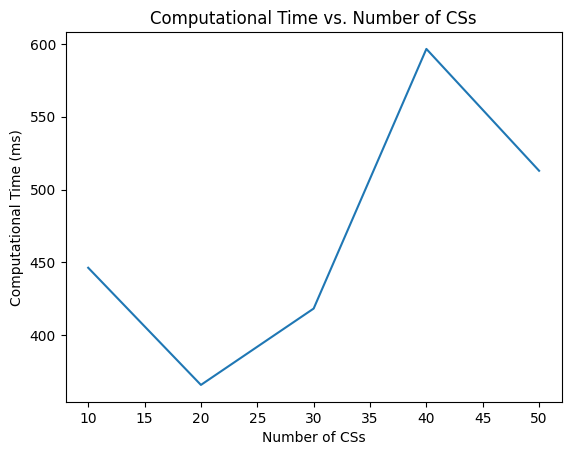

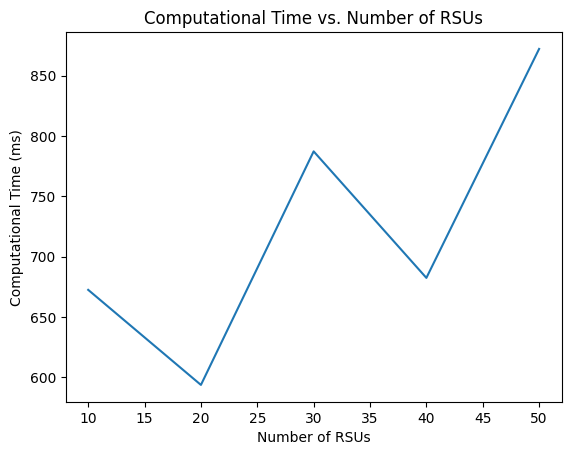

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self, key_size):
        self.key_size = key_size

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha256(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=self.key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc, num_evs, num_cs, num_rsus):
    # Registration process for EVs
    ev_identities = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_public_keys = []
    ev_pseudo_identities = []
    for ev_identity in ev_identities:
        ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
        ev_public_keys.append(ev_public_key)
        ev_pseudo_identities.append(ev_pseudo_identity)

    # Registration process for CSs
    cs_identities = ["CS" + str(i) for i in range(1, num_cs + 1)]
    cs_public_keys = []
    cs_pseudo_identities = []
    for cs_identity in cs_identities:
        cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)
        cs_public_keys.append(cs_public_key)
        cs_pseudo_identities.append(cs_pseudo_identity)

    # Registration process for RSUs
    rsu_identities = ["RSU" + str(i) for i in range(1, num_rsus + 1)]
    rsu_public_keys = []
    rsu_pseudo_identities = []
    for rsu_identity in rsu_identities:
        rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)
        rsu_public_keys.append(rsu_public_key)
        rsu_pseudo_identities.append(rsu_pseudo_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udcs = []
    for ev_public_key, ev_pseudo_identity in zip(ev_public_keys, ev_pseudo_identities):
        auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)
        auth_ev_udcs.append(auth_ev_udc)

    t_cs = "Tst2"
    auth_cs_udcs = []
    for cs_public_key, cs_pseudo_identity in zip(cs_public_keys, cs_pseudo_identities):
        auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)
        auth_cs_udcs.append(auth_cs_udc)

    t_rsu = "Tst3"
    auth_rsu_udcs = []
    for rsu_public_key, rsu_pseudo_identity in zip(rsu_public_keys, rsu_pseudo_identities):
        auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)
        auth_rsu_udcs.append(auth_rsu_udc)


def plot_computational_time(x_values, y_values, x_label, y_label, title):
    plt.plot(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


def main():
    num_executions = 10
    num_evs = 5  # Number of EVs
    num_cs = 5  # Number of CSs
    num_rsus = 5  # Number of RSUs

    # Vary the number of EVs
    ev_values = [10, 20, 30, 40, 50]  # Number of EVs to test
    ev_x_values = ev_values
    ev_y_values = []

    for num_evs in ev_values:
        execution_times = []
        for _ in range(num_executions):
            udc = UDC(key_size=512)  # Set the desired key size
            execution_time = run_protocol(udc, num_evs, num_cs, num_rsus)
            execution_times.append(execution_time)
        average_execution_time = sum(execution_times) / num_executions
        ev_y_values.append(average_execution_time)

    plot_computational_time(ev_x_values, ev_y_values, 'Number of EVs', 'Computational Time (ms)',
                            'Computational Time vs. Number of EVs')

    # Vary the number of CSs
    cs_values = [10, 20, 30, 40, 50]  # Number of CSs to test
    cs_x_values = cs_values
    cs_y_values = []

    for num_cs in cs_values:
        execution_times = []
        for _ in range(num_executions):
            udc = UDC(key_size=512)  # Set the desired key size
            execution_time = run_protocol(udc, num_evs, num_cs, num_rsus)
            execution_times.append(execution_time)
        average_execution_time = sum(execution_times) / num_executions
        cs_y_values.append(average_execution_time)

    plot_computational_time(cs_x_values, cs_y_values, 'Number of CSs', 'Computational Time (ms)',
                            'Computational Time vs. Number of CSs')

    # Vary the number of RSUs
    rsu_values = [10, 20, 30, 40, 50]  # Number of RSUs to test
    rsu_x_values = rsu_values
    rsu_y_values = []

    for num_rsus in rsu_values:
        execution_times = []
        for _ in range(num_executions):
            udc = UDC(key_size=512)  # Set the desired key size
            execution_time = run_protocol(udc, num_evs, num_cs, num_rsus)
            execution_times.append(execution_time)
        average_execution_time = sum(execution_times) / num_executions
        rsu_y_values.append(average_execution_time)

    plot_computational_time(rsu_x_values, rsu_y_values, 'Number of RSUs', 'Computational Time (ms)',
                            'Computational Time vs. Number of RSUs')


if __name__ == '__main__':
    main()
